# Домашнє завданя 5

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score

# Збір даних

Потрібно зібрати дані з акселерометра мобільного телефону. Для того ми сопочатку розархівуємо файл homework.zip з дани для анаізу і зберем їх в датасет- data*.

In [60]:
from pathlib import Path
activities = ['idle', 'running', 'stairs', 'walking']
data_collections = []

for index, activity in enumerate(activities, start=1):
    activity_path = Path('data') / activity  
    csv_files = list(activity_path.glob('*.csv'))  
    df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
    df['activity'] = activity
    data_collections.append(df)

data = pd.concat(data_collections, ignore_index=True)
data

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


# Нормалізуємо вихіді дані 

Тренування на ненормаліованих даних займає чимало часу. Вхідні дані нормалізуються так, щоб їхнє середнє значення дорівнювало нулю, а стандартне відхилення - одиниці.

В якості характеристик візьмемо показники з акселерометра

In [61]:
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']

In [62]:
scaler = StandardScaler()

data_to_normalize = data[features]

# Нормалізація даних
normalized_data = scaler.fit_transform(data_to_normalize)

# Заміна вихідних даних нормалізованими даними
ndata = data.copy()
ndata[features] = normalized_data
ndata

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,-0.109791,0.241917,0.941538,idle
1,-0.143404,0.209288,0.923560,idle
2,-0.337109,-0.150782,1.028762,idle
3,0.377889,-0.116234,0.919565,idle
4,-0.019205,-0.141185,1.035420,idle
...,...,...,...,...
193855,0.379029,-1.366884,-0.455385,walking
193856,0.529435,-1.069384,-1.394879,walking
193857,0.162535,-0.929271,-0.304241,walking
193858,-0.583227,-0.372659,-0.073862,walking


# Розділяємо дані на навчальний і тестовий набори

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data["activity"], test_size=0.3, stratify=ndata["activity"], random_state=42)

# Виконаємо навчання нашої моделі  за допомогою алгоритму SVM

In [64]:
import time

model_svm = SVC() # Створеня моделі на основі алготму SVM
start_time = time.time()
model_svm.fit(X_train, y_train) # Навчання моделі.
end_time = time.time()
execution_time_svm = end_time - start_time
print(f"Час, витрачений  на навчання моделі SVM: {(execution_time_svm):.4f} секунд")

Час, витрачений  на навчання моделі SVM: 693.4818 секунд


# Прогнозування значень для нашої моделі навченої за допомогою алгоритму SVM(На тестових даних)

In [65]:
start_time = time.time()
svm_prediction = model_svm.predict(X_test) # Прогнозування результатів SVM на тестових даних .
end_time = time.time()
execution_time_svm_prediction = end_time - start_time
print(f"Час, витрачений  на навчання моделі SVM (тестові дані): {(execution_time_svm_prediction):.4f} секунд")

Час, витрачений  на навчання моделі SVM (тестові дані): 420.3430 секунд


# Виконаємо навчання нашої моделі  за допомогою алгоритму RFC

In [66]:

model_rfc = RandomForestClassifier() # Створеня моделі на основі алготму RFC
start_time = time.time()
model_rfc.fit(X_train, y_train) # Навчання моделі.
end_time = time.time()
execution_time_rfc = end_time - start_time
print(f"Час, витрачений  на навчання моделі RFC: {(execution_time_rfc):.4f} секунд")

Час, витрачений  на навчання моделі RFC: 36.3747 секунд


# Прогнозування значень для нашої моделі навченої за допомогою алгоритму RFC(На тестових даних)

In [67]:
start_time = time.time()
rfс_prediction = model_rfc.predict(X_test) # Прогнозування результатів RFC на тестових даних .
end_time = time.time()
execution_time_rfc_prediction = end_time - start_time
print(f"Час, витрачений  на навчання моделі RFC(тестові дані): {(execution_time_rfc_prediction):.4f} секунд")

Час, витрачений  на навчання моделі RFC(тестові дані): 1.3850 секунд


# Порівнюємо точність результатів
Визначаємо точність моделей на тестовому наборі та порівнюємо

In [68]:
accuracy_svm = model_svm.score(X_test, y_test)
accuracy_rfc = model_rfc.score(X_test, y_test)

print(f"Точність моделі SVM: {accuracy_svm:.4f} ,  Затрачений час на навчання {(execution_time_svm):.4f} секунд")
print(f"Точність моделі RFC: {accuracy_rfc:.4f} ,  Затрачений час на навчання {(execution_time_rfc):.4f} секунд")



Точність моделі SVM: 0.8930 ,  Затрачений час на навчання 693.4818 секунд
Точність моделі RFC: 0.9997 ,  Затрачений час на навчання 36.3747 секунд


# Побудуємо матрицю помилок confusion matrix і візіалізуємо її для наочного порівняння

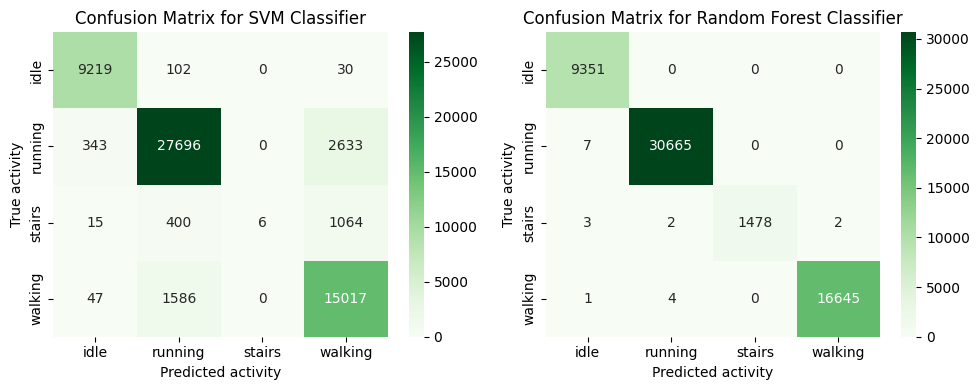

In [69]:
conf_matrix_svm = confusion_matrix(y_test, svm_prediction)
conf_matrix_rf = confusion_matrix(y_test, rfс_prediction)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

classifiers = ["SVM", "Random Forest"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]

for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Greens',
        xticklabels=activities,
        yticklabels=activities,
        ax=axes[i],
    )
    axes[i].set_title(f"Confusion Matrix for {classifier} Classifier")
    axes[i].set_xlabel("Predicted activity")
    axes[i].set_ylabel("True activity")

plt.tight_layout()

plt.show()


# Порівняємо результати роботи обох алгоритмів використавши метод classification report

In [70]:
svm_report = classification_report(y_test, svm_prediction)

print(svm_report)

              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      9351
     running       0.93      0.90      0.92     30672
      stairs       1.00      0.00      0.01      1485
     walking       0.80      0.90      0.85     16650

    accuracy                           0.89     58158
   macro avg       0.92      0.70      0.69     58158
weighted avg       0.90      0.89      0.88     58158



In [71]:
rfc_report = classification_report(y_test, rfс_prediction)

print(rfc_report)
     

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      9351
     running       1.00      1.00      1.00     30672
      stairs       1.00      1.00      1.00      1485
     walking       1.00      1.00      1.00     16650

    accuracy                           1.00     58158
   macro avg       1.00      1.00      1.00     58158
weighted avg       1.00      1.00      1.00     58158



# Висновки

Проведені нами дослідження та аналіз результаів двох моделей навчання, за алгоритмами SVM і RFC на різних фічах ,вказує на суттєву перевагу  алгоритму RFC над алгоритмом SVM ,для запропонованого ДАТАСЕТУ homework.zip, за ключовими ознаками . А саме точність моделі і швидкість навчання.   
Точність моделі SVM: 0.8930 ,  Затрачений час на навчання 539.8018 секунд   
Точність моделі RFC: 0.9997 ,  Затрачений час на навчання 33.7478 секунд



Алгоритм SVM намагається знайти оптимальну підмножину ознак, яка найкраще класифікує дані. У випадку з даними про рух людини, які мають багато шуму і невизначеності, це є дуже складним завданням, шо підтверджується нашими дослідженнями .

Алгоритм RFC показує кращу точність та набагато менший час навчання,для запропонованого ДАТАСЕТУ homework.zip, оскільки це більш стійкий до шуму і невизначеності алгоритм. Метод RFC генерує декілька дерев рішень, і кожен з них голосує за класифікацію. Це дозволяє йому бути більш точним, ніж алгоритм SVM, який генерує лише одне дерево рішень. Крім того, метод  має набагато меншу кількість параметрів, ніж алгоритм SVM, що також сприяє його більш швидкому навчанню.

Також  аналіз матриці помилок та метод classification_report підтверджує, що класифікатор random forest(RFC) помиляється значно менше, ніж SVM

 Нормалізації ознак - робить дані більш однорідними, що полегшує навчання моделей , підвищує точність класифікації та знижує час навчання.